<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skills_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GENERAL OVERVIEW OF DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load datasets
articles_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
authors_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

In [ ]:
articles_data = pd.read_csv('/content/articles.Dengue.csv')
authors_data = pd.read_csv('/content/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/paper_counts.csv')

In [ ]:
#Affiliation of institutes with the number of articles posted.

authors_data['AuthorAffiliation'] = authors_data['AuthorAffiliation'].fillna(method='ffill')
authors_data

authors_data.to_csv('author_data.csv')

authors1 = authors_data.groupby('AuthorAffiliation')['PMID'].count().reset_index()
authors2 = authors1.sort_values(by = 'PMID', ascending = False)
authors2.rename(columns= {'AuthorAffiliation' : 'Institute', 'PMID' : 'Number of articles published'})



,Institute,Number of articles published
12361,"Environmental Health Institute, National Envir...",77
12166,"Eijkman Institute for Molecular Biology, Jakar...",76
10675,"Department of Virology, Armed Forces Research ...",71
19766,"Novartis Institute for Tropical Diseases, Sing...",70
19992,"Oxford University Clinical Research Unit, Ho C...",64
...,...,...
13884,"Graduate University of Science and Technology,...",1
13885,"Graduate student, Computer Science , Rutgers U...",1
13886,"Graduation Program of Health Sciences, Faculty...",1
13887,"Graduação em Medicina Veterinária, Faculdade d...",1


In [ ]:
#Merging both the datasets
merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
merged_df.head(10)

#Selecting articles posted between 2018 and 2024
selected_rows = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
#SR_sort= selected_rows.sort_values(by = 'Year', ascending = False)
#SR_sort

#Top 10 institutes with the most number of publications in the last 5 years
Institute_article_counts = selected_rows.groupby(['AuthorAffiliation']).agg({'PMID': 'count'}).reset_index()
#Institute_article_counts
aad = Institute_article_counts.sort_values(by = 'PMID', ascending = False)
aad = aad.rename(columns ={'AuthorAffiliation' : 'Institute','PMID':'No. of articles published'})
aad.head(10)

,Institute,No. of articles published
7415,"Environmental Health Institute, National Envir...",73
4610,"Department of Medical Biotechnologies, Univers...",54
4723,"Department of Medical Oncology and Pneumology,...",38
6868,Division of Epidemiology and Communicable Dise...,38
2184,"Dengue Branch, Centers for Disease Control and...",38
4351,"Department of Integrative Biology, University ...",37
14380,"Unité de Virologie Structurale, Institut Paste...",35
7240,"Drug Discovery and Development Division, Patan...",35
15020,"Wadsworth Center, New York State Department of...",35
4331,Department of Infectomics and Molecular Pathog...,34


## WHO IS MOST ACTIVE

In [ ]:
# Total number of article contributions by an author

author_activity = authors_data.groupby(['AuthorInitials', 'AuthorLastname']).size().reset_index(name='ArticleCount')
most_active_authors = author_activity.sort_values(by='ArticleCount', ascending=False)
most_active_authors


,AuthorInitials,AuthorLastname,ArticleCount
8343,E,Harris,129
8856,EE,Ooi,79
6213,CP,Simmons,70
2810,AL,Rothman,66
35315,YS,Leo,62
...,...,...,...
13832,J,Mora,1
13831,J,Moon,1
13830,J,Mons,1
13827,J,Mongkolsapaja,1


In [ ]:
#find top 25 author contributions and create a viz
most_active_20 = most_active_authors.head(20)

#create a new column in df of author full name for easier distinguishing
most_active_20['Author Full Name'] = most_active_20['AuthorInitials'] + ' ' + most_active_20['AuthorLastname']
most_active_20


<ipython-input-20-a2fb8dc7e1f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_active_20['Author Full Name'] = most_active_20['AuthorInitials'] + ' ' + most_active_20['AuthorLastname']


,AuthorInitials,AuthorLastname,ArticleCount,Author Full Name
8343,E,Harris,129,E Harris
8856,EE,Ooi,79,EE Ooi
6213,CP,Simmons,70,CP Simmons
2810,AL,Rothman,66,AL Rothman
35315,YS,Leo,62,YS Leo
1912,A,Wilder-Smith,59,A Wilder-Smith
30587,SG,Vasudevan,59,SG Vasudevan
26052,PY,Shi,56,PY Shi
30713,SJ,Thomas,53,SJ Thomas
35038,Y,Zhang,53,Y Zhang


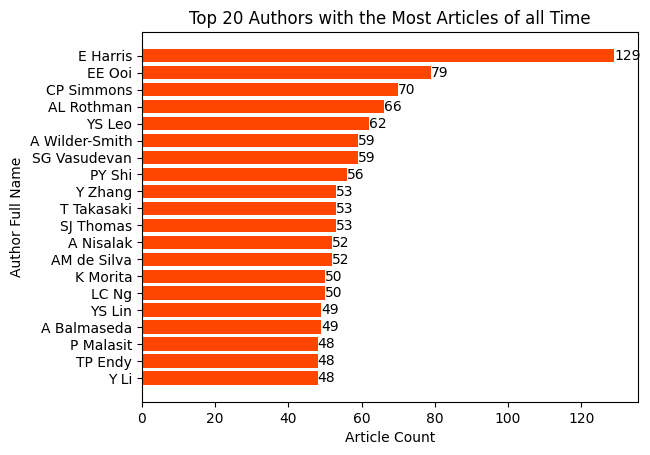

In [ ]:
most_active_20 = most_active_20.sort_values(by = 'ArticleCount', ascending = True)

fig, ax = plt.subplots()
bars = ax.barh(most_active_20['Author Full Name'], most_active_20['ArticleCount'], color='orangered')

for bar, value in zip(bars, most_active_20['ArticleCount']):
  plt.text(bar.get_width(),bar.get_y() + bar.get_height()/2, value, ha ='left', va = 'center', color = 'black', fontsize = 10)
  ax.set_xlabel('Article Count')
  ax.set_ylabel('Author Full Name')
  ax.set_title('Top 20 Authors with the Most Articles of all Time')

In [ ]:
merged_data = pd.merge(authors_data, articles_data, on='PMID')
merged_data

In [ ]:
#Top 20 active reasearchers (based on number of articles published in the last 5 years)

#Merging both the datasets
merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
merged_df.head(20)


#Selecting articles posted between 2018 and 2024
selected_rows = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
#SR_sort= selected_rows.sort_values(by = 'Year', ascending = False)
#SR_sort

author_article_counts = selected_rows.groupby(['AuthorForename', 'AuthorLastname']).agg({'PMID': 'count'}).reset_index()
aac = author_article_counts.sort_values(by = 'PMID', ascending = False)
aac = aac.rename(columns ={'PMID':'No. of articles published'})
aac

top_20_articles = aac.head(20)
top_20_articles

,AuthorForename,AuthorLastname,No. of articles published
6022,Eva,Harris,38
6791,Gabriela,Paz-Bailey,35
20317,Stephen J,Thomas,26
17262,R Tedjo,Sasmono,23
11102,Kouichi,Morita,21
5782,Eng Eong,Ooi,21
17899,Richard G,Jarman,20
21721,Tyler M,Sharp,19
3052,Cameron P,Simmons,19
11428,Laura E,Adams,19


In [ ]:
#Create new column of first and last name for visualisations
top_20_articles['Author Full Name'] = top_20_articles['AuthorForename'] + ' ' + top_20_articles['AuthorLastname']
top_20_articles

<ipython-input-27-8b83ec4aea00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_articles['Author Full Name'] = top_20_articles['AuthorForename'] + ' ' + top_20_articles['AuthorLastname']


,AuthorForename,AuthorLastname,No. of articles published,Author Full Name
6022,Eva,Harris,38,Eva Harris
6791,Gabriela,Paz-Bailey,35,Gabriela Paz-Bailey
20317,Stephen J,Thomas,26,Stephen J Thomas
17262,R Tedjo,Sasmono,23,R Tedjo Sasmono
11102,Kouichi,Morita,21,Kouichi Morita
5782,Eng Eong,Ooi,21,Eng Eong Ooi
17899,Richard G,Jarman,20,Richard G Jarman
21721,Tyler M,Sharp,19,Tyler M Sharp
3052,Cameron P,Simmons,19,Cameron P Simmons
11428,Laura E,Adams,19,Laura E Adams


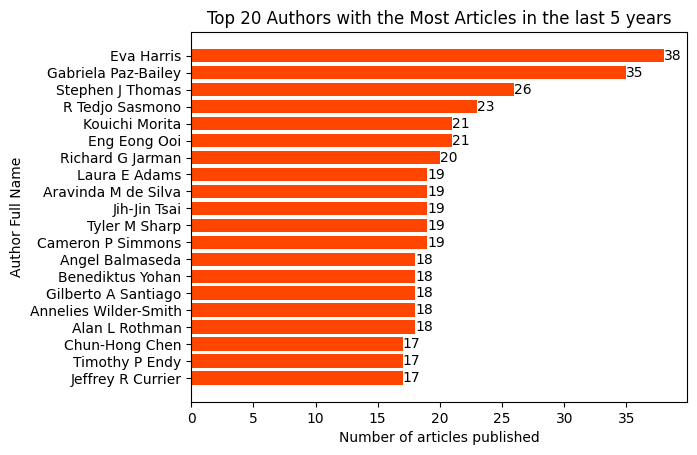

In [ ]:
top_20_articles = top_20_articles.sort_values(by = 'No. of articles published', ascending = True)

fig, ax = plt.subplots()
bars = ax.barh(top_20_articles['Author Full Name'], top_20_articles['No. of articles published'], color='orangered')

for bar, value in zip(bars, top_20_articles['No. of articles published']):
  plt.text(bar.get_width(),bar.get_y() + bar.get_height()/2, value, ha ='left', va = 'center', color = 'black', fontsize = 10)
  ax.set_xlabel('Number of articles published')
  ax.set_ylabel('Author Full Name')
  ax.set_title('Top 20 Authors with the Most Articles in the last 5 years')

In [ ]:
#create new column on articles dataset - GONNA HAVE TO MERGE 2 DATASETS ON EACHOTHER AND MAKE A NEW DATASSET EITH AUTHOR INITLAS AND YEAR
combined_data = pd.merge(authors_data, articles_data, on="PMID")
active_over_time[] = combined_data['Author Full Name', 'Year']
active_over_time

#merge active authors and dates they published then make graph
#active_over_time = articles_data["Pclass"].isin([2, 3])


#need to make a cumulative frequency of the top 20 and then show this on a a line graph
#Articles_years = px.line(articles_data, x='Year', y='Author_cumulative', color='Author Full Name')
#Articles_years

SyntaxError: invalid syntax (<ipython-input-38-1f3bbf64ce35>, line 3)

### WHO WORKS WITH WHOM

In [ ]:
#Number of researchers working on a paper

authors3 = authors_data.groupby('PMID')['AuthorN'].max().reset_index()
authors3.rename(columns={'AuthorN':'No. of researchers working on the article'})


,PMID,No. of researchers working on the article
0,10548291,2
1,10548309,4
2,10555454,4
3,10559263,2
4,10588771,5
...,...,...
9643,38081831,21
9644,38086397,9
9645,38090413,2
9646,38095160,4


In [ ]:
#Loaded the data
articles_data = pd.read_csv('articles.Dengue.csv')
authors_data = pd.read_csv('authors.Dengue.csv')
paper_count_data = pd.read_csv('paper_counts.csv')

In [ ]:
# Merging the articles and authors datasets on PMID to get a combined dataset
combined_data = pd.merge(authors_data, articles_data, on="PMID")

# Creating a dataframe to track collaborations
# For each article, we will have pairs of authors who have worked together
collaborations = []

for pmid in combined_data['PMID'].unique():
    authors_of_paper = combined_data[combined_data['PMID'] == pmid]
    authors_list = authors_of_paper[['AuthorForename', 'AuthorLastname']].values
    for i in range(len(authors_list)):
        for j in range(i + 1, len(authors_list)):
            author1 = f"{authors_list[i][0]} {authors_list[i][1]}"
            author2 = f"{authors_list[j][0]} {authors_list[j][1]}"
            collaborations.append([pmid, author1, author2])

# Creating a DataFrame for collaborations
collaborations_df = pd.DataFrame(collaborations, columns=['PMID', 'Author1', 'Author2'])

# Previewing the collaborations dataframe
collaborations_df



,PMID,Author1,Author2
0,10548291,E J Dechant,J G Rigau-Pérez
1,10548309,N Jirakanjanakit,M M Khin
2,10548309,N Jirakanjanakit,S Yoksan
3,10548309,N Jirakanjanakit,N Bhamarapravati
4,10548309,M M Khin,S Yoksan
...,...,...,...
296449,38095160,Marta Álvarez-García,Rocío Calvo Hernández
296450,38095160,Lola Otegui,Adriana Ortega Larrodé
296451,38095160,Lola Otegui,Rocío Calvo Hernández
296452,38095160,Adriana Ortega Larrodé,Rocío Calvo Hernández


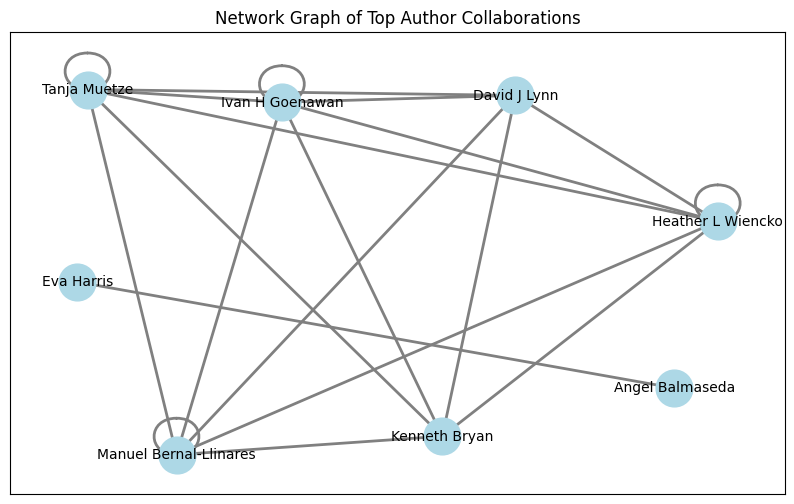

In [ ]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Counting the frequency of each collaboration pair
collaboration_counts = Counter(
    (author1, author2) for _, author1, author2 in collaborations
)

# Selecting the top collaborations for visualization
# For simplicity, let's take the top 20 collaborations
top_collaborations = collaboration_counts.most_common(20)

# Creating a network graph
G = nx.Graph()
for (author1, author2), count in top_collaborations:
    G.add_edge(author1, author2, weight=count)

# Drawing the network graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=50, iterations=20)
nx.draw_networkx(G, pos, node_size=700, font_size=10, width=2, edge_color='gray', node_color='lightblue')
plt.title('Network Graph of Top Author Collaborations')
plt.show()



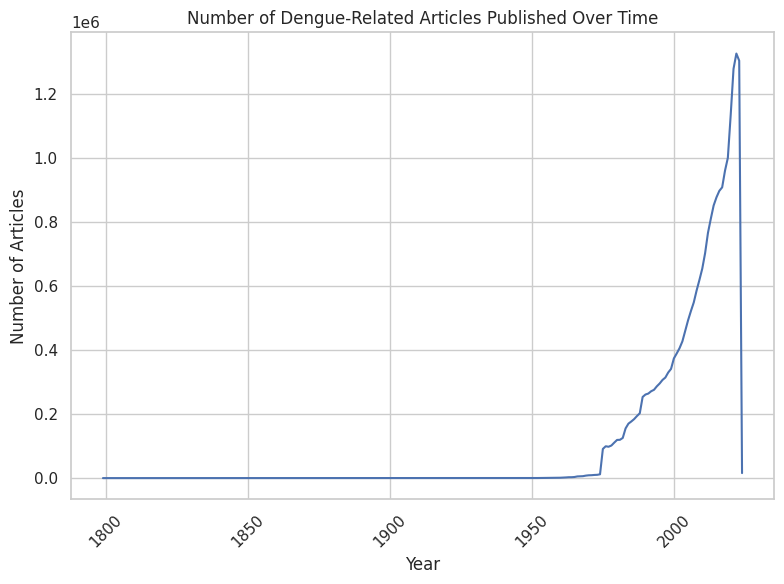

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the number of papers published over time
plt.figure(figsize=(8, 6))
sns.lineplot(data=paper_count_data, x="Year", y="Count")
plt.title("Number of Dengue-Related Articles Published Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


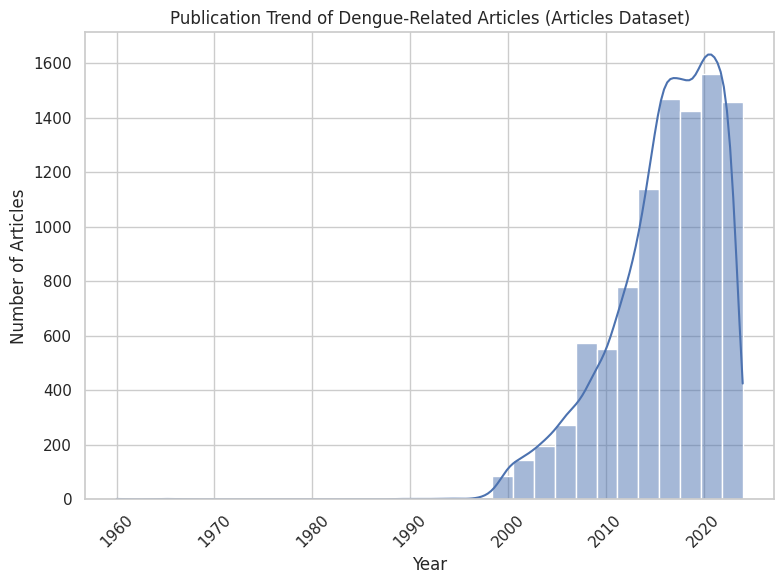

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=articles_data, x="Year", bins=30, kde=True, color = 'blue')
plt.title("Publication Trend of Dengue-Related Articles (Articles Dataset)")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming articles_data is your DataFrame and it's already loaded
top_journals = articles_data['Journal'].value_counts().head(10)

# Create a Plotly pie chart
fig = px.pie(top_journals, names=top_journals.index, values=top_journals.values,
             title='Top Research Journals for Dengue Publications',
             labels={'index': 'Journal', 'value': 'Number of Publications'})
#fig.update_traces(textinfo='percent+label')
fig.show()


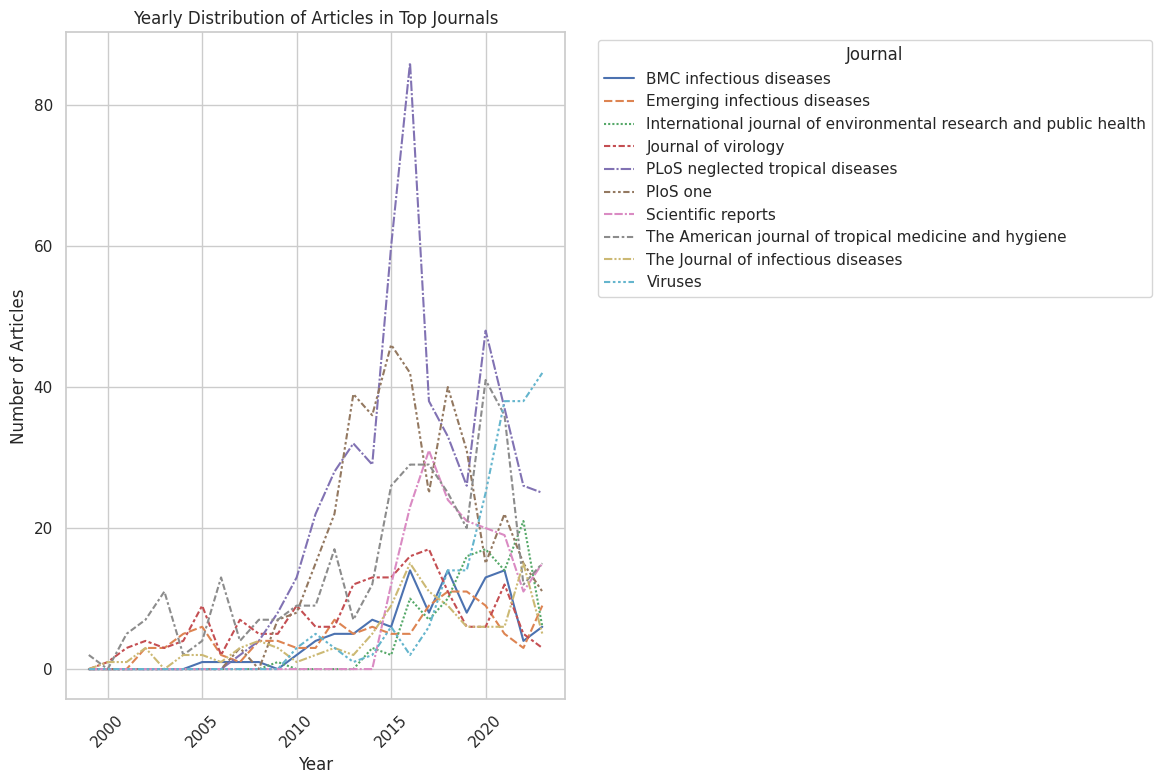

In [ ]:
# Identifying the top journals
top_journal_list = top_journals.index.tolist()

# Filtering the articles dataset for these top journals
top_journals_articles = articles_data[articles_data['Journal'].isin(top_journal_list)]

# Creating a pivot table for the number of articles per year in each top journal
yearly_distribution = top_journals_articles.pivot_table(index='Year', columns='Journal', aggfunc='size', fill_value=0)

# Plotting the yearly distribution of articles in top journals
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_distribution)
plt.title("Yearly Distribution of Articles in Top Journals")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.legend(title='Journal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a graph
G = nx.Graph()

# Adding nodes and edges based on co-authorship
for pmid, group in authors_data.groupby('PMID'):
    authors = group[['AuthorForename', 'AuthorLastname']].agg(' '.join, axis=1).tolist()
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            if authors[i] != authors[j]:
                G.add_edge(authors[i], authors[j])

# Drawing the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=20, width=0.5)
plt.title("Co-Authorship Network Among Dengue Research Authors")
plt.show()


TypeError: sequence item 0: expected str instance, float found

In [ ]:
# Setting a threshold for minimum number of co-authored papers
coauthorship_threshold = 3

# Creating a new graph with the threshold
G_threshold = nx.Graph()

# Counting co-authorships and adding edges only if they meet the threshold
coauthorship_count = authors_data.groupby('PMID').apply(lambda x: list(x[['AuthorForename', 'AuthorLastname']].agg(' '.join, axis=1)))
for authors in coauthorship_count:
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            if authors[i] != authors[j]:
                if G_threshold.has_edge(authors[i], authors[j]):
                    G_threshold[authors[i]][authors[j]]['weight'] += 1
                else:
                    G_threshold.add_edge(authors[i], authors[j], weight=1)

# Removing edges that do not meet the threshold
for u, v, d in list(G_threshold.edges(data=True)):
    if d['weight'] < coauthorship_threshold:
        G_threshold.remove_edge(u, v)

# Drawing the graph with a threshold
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_threshold, k=0.15, iterations=20)
nx.draw_networkx(G_threshold, pos, with_labels=False, node_size=20, width=0.5, edge_color="grey", alpha=0.4)
plt.title(f"Co-Authorship Network Among Dengue Research Authors (Minimum {coauthorship_threshold} Papers Together)")
plt.show()


TypeError: sequence item 0: expected str instance, float found

0    1799
1    1801
2    1802
3    1805
4    1866
Name: Year, dtype: int64
int64


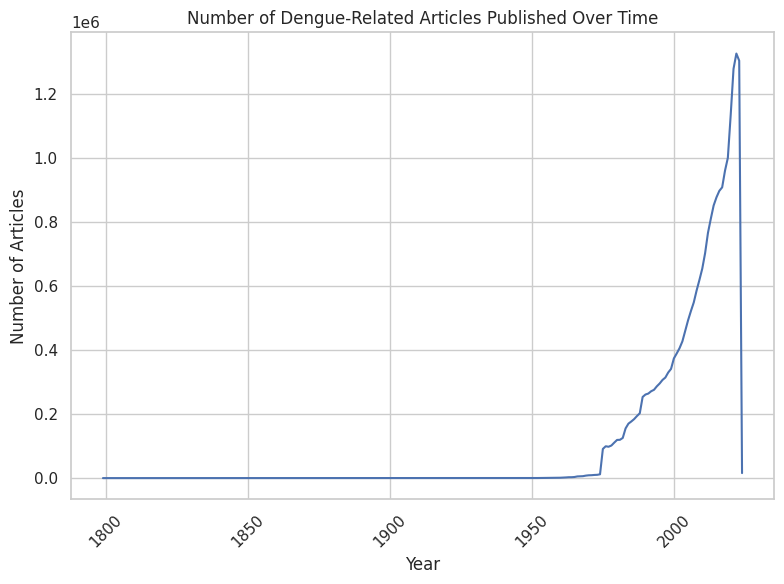

In [ ]:
# Check the first few rows of the 'Year' column
print(paper_count_data['Year'].head())

# Check the data type of the 'Year' column
print(paper_count_data['Year'].dtype)

# Convert 'Year' to integer
paper_count_data['Year'] = paper_count_data['Year'].astype(int)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data=paper_count_data, x="Year", y="Count")
plt.title("Number of Dengue-Related Articles Published Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

